# Project 13: Predicting Bike Rentals
## Machine Learning

In this project, we will use Random Forest Regression to predict bike rentals.

Datasets used in this project from:
* [Bike Sharing](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

We will directly import and clean dataset by featuring useful columns:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bike_rental_hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#assign time stamps as morning=1, afternoon=2, evening=3, and night=4
def assign_label(v):
    if v < 6:
        return 1
    if v < 12:
        return 2
    if v < 18:
        return 3
    return 4

In [4]:
df['timestamp'] = df['hr'].apply(assign_label)
drop_cols = ['mnth','temp','instant','dteday','registered','casual','hr']
df = df.drop(drop_cols,axis=1)
df.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,timestamp
0,1,0,0,6,0,1,0.2879,0.81,0.0,16,1
1,1,0,0,6,0,1,0.2727,0.80,0.0,40,1
2,1,0,0,6,0,1,0.2727,0.80,0.0,32,1
3,1,0,0,6,0,1,0.2879,0.75,0.0,13,1
4,1,0,0,6,0,1,0.2879,0.75,0.0,1,1


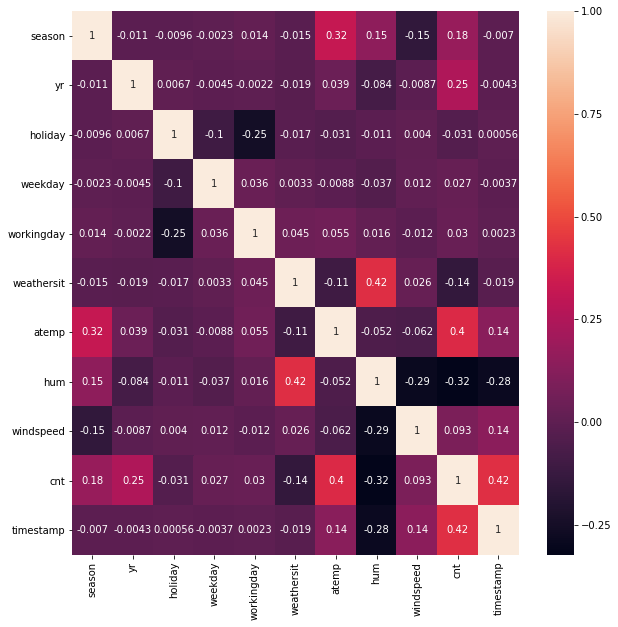

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

We will now use Random Forest Model to calculate error:

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def train_and_test(df,folds=10):
    numeric_df = df.select_dtypes(include=['integer','float'])
    train_cols = numeric_df.columns.drop('cnt')
    rf = RandomForestRegressor(n_estimators = 10)
    kf = KFold(folds,shuffle=True)
    mses = cross_val_score(rf, df[train_cols], df['cnt'], scoring="neg_mean_squared_error", cv=kf)
    return np.mean(np.sqrt(np.absolute(mses)))    

In [8]:
train_and_test(df)

117.09080827935784

End. Thankyou!